In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import numpy as np

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price

#Friend meetings, Member
50 Evelyn Jefferson

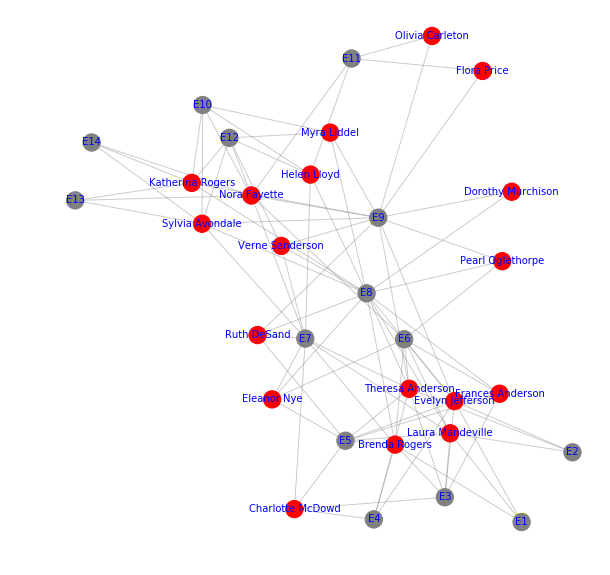

In [12]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite

G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]
for node in women:
    G.node[node]["category"] = "woman"
for node in clubs:
    G.node[node]["category"] = "event"
color_map = {
    "event": "grey",
    "woman": "red"}

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")

plt.figure(figsize=(10,10))
pos = nx.spring_layout(G,k=0.55,iterations=80)
pos_labels = {}
keys = pos.keys()
for key in keys:
    x, y = pos[key]
    pos_labels[key] = (x, y)
nx.draw_networkx_labels(G, pos_labels, font_color='Blue', font_size=10)
nx.draw_networkx_edges(G, pos, edge_color="Gray", alpha=0.4)
nx.draw_networkx_nodes(G, pos, node_color=[color_map[G.node[node]['category']] for node in G], node_size=300)
plt.axis("off")
plt.show()

In [ ]:
nodes = []
for woman in women:
    nodes.append((woman,"woman"))
for event in clubs:
    nodes.append((event,"event"))

node_data = pd.DataFrame(nodes, columns =['node', 'type']) 

node_data['degcen'] = 0
node_data['eigencen'] = 0
node_data['closecen'] = 0
node_data['betweencen'] = 0
node_data.head()



deg = nx.degree(G) 
eig = nx.eigenvector_centrality(G)
clo = nx.closeness_centrality(G)
btw = nx.betweenness_centrality(G)

for index, row in node_data.iterrows():
    node_data.loc[node_data['node'] == row['node'], 'degcen'] = deg[row['node']]
    node_data.loc[node_data['node'] == row['node'], 'eigencen'] = eig[row['node']]
    node_data.loc[node_data['node'] == row['node'], 'closecen'] = clo[row['node']]
    node_data.loc[node_data['node'] == row['node'], 'betweencen'] = btw[row['node']]

node_data_deg = node_data.groupby("type")['degcen'].mean().reset_index()
node_data_eig = node_data.groupby("type")['eigencen'].mean().reset_index()
node_data_clo = node_data.groupby("type")['closecen'].mean().reset_index()
node_data_btw = node_data.groupby("type")['betweencen'].mean().reset_index()

result = pd.concat([node_data_deg,node_data_eig,node_data_clo,node_data_btw],axis = 1)
result = result.loc[:,~result.columns.duplicated()]
print(result)

In comparing the categories of events and women we can see the events have a higher average of centrality than the women